In [2]:
import pandas as pd

In [3]:
oil = pd.read_csv("../retail/oil.csv")

# Assignment 1: Simple Line Chart

Build a simple line plot for the oil series. Are there any interesting patterns here? 

What happened in 2014 to oil price?

In [4]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


<Axes: xlabel='date'>

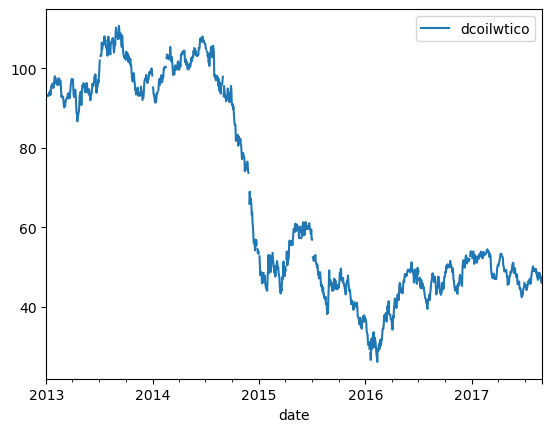

In [5]:
oil.astype({"date":"datetime64"}).plot(x="date")

# Assignment 2: Upgraded Line Chart


Give your chart a style, add axis titles, and change the color of the line to black. 

Consider converting the date column to datetime64.

Rename the column to a more intuitive name for the audience.

In [23]:
oil.head()
import matplotlib
matplotlib.style.use("ggplot")

<Axes: title={'center': 'Oil Price trends'}, xlabel='date', ylabel='price'>

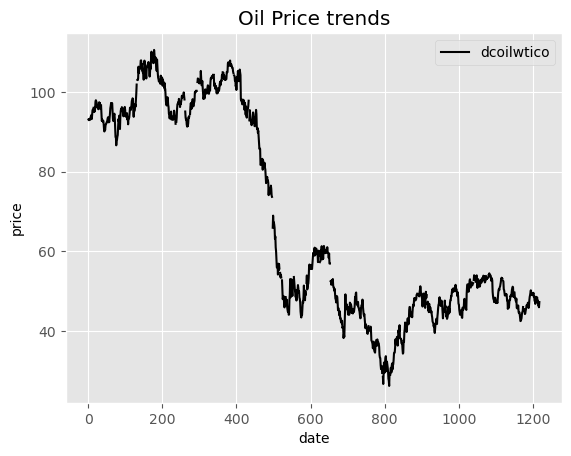

In [59]:
oil.plot(
title="Oil Price trends",
xlabel="date",
ylabel="price",
color='Black'
)

# Assignment 3: Subplots

Filter the transactions table to stores 1, 2, 3 and 4, then reshape it so each row is a date, and the columns of the table are the transactions for each store. 

Once you've done that, create a 2x2 line plot of transactions vs time, with one plot for each store.

Thanks!

In [60]:
transactions = pd.read_csv("../retail/transactions.csv")
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [61]:
store_1234=(
transactions.loc[transactions["store_nbr"].isin([1,2,3,4])]
.pivot_table(index="date",columns="store_nbr")
.droplevel(0,axis=1)
)

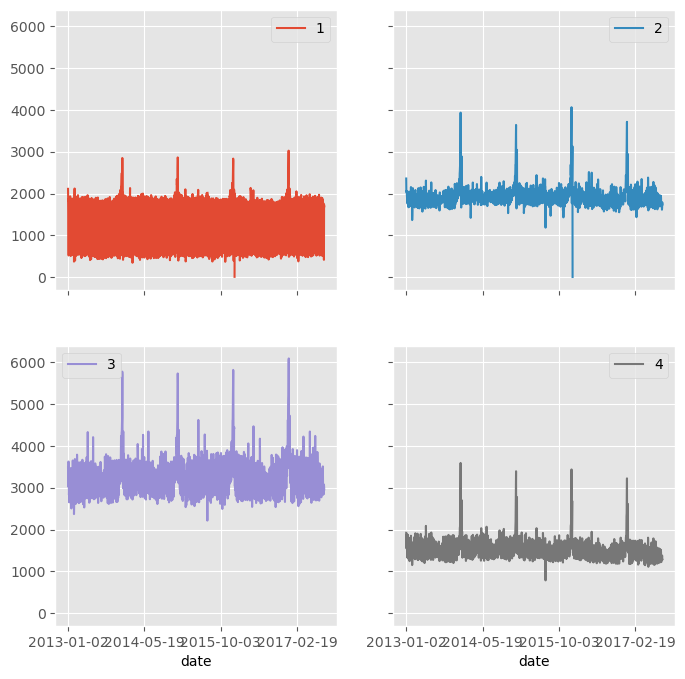

In [62]:
store_1234.plot(
    subplots=True,
    layout=(2,2),
    figsize=(8,8),
    sharey=True
    );


# Assignment 4: Bar Charts

Create a sorted Bar chart of total sales by store number for stores 1, 2, 3 and 4.

Then create a horizontal stacked bar chart of sales by month, stacked by store number. 

In [76]:
# convert dates to datetime64

store_1234.index = store_1234.index.astype("datetime64[ns]") 

store_1234

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


<Axes: xlabel='store_nbr'>

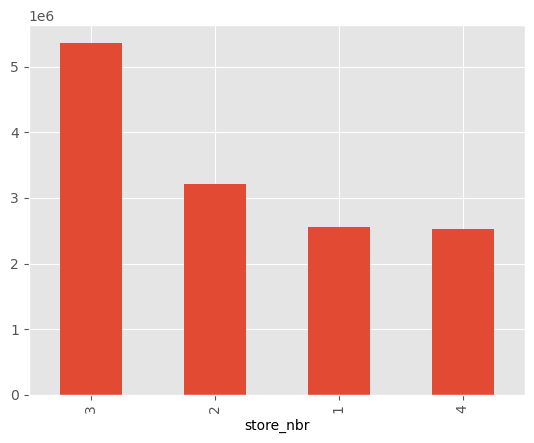

In [68]:
# stores_1234.index.month will allow you to groupby the month! You can also slice it.
store_1234.sum().sort_values(ascending=False).plot.bar()

In [73]:
store_1234_monthly=store_1234.groupby(store_1234.index.month).sum()

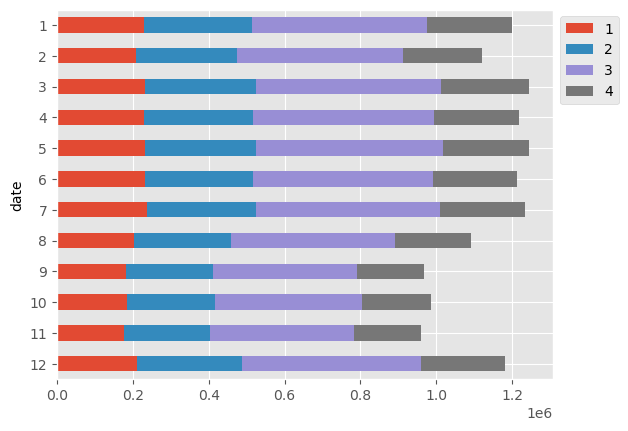

In [74]:
store_1234_monthly.sort_index(ascending=False).plot.barh(stacked=True).legend(bbox_to_anchor=(1,1))

# Assignment 5: Scatterplots

Plot the relationship between store 2 and store 3 sales.

Color the dots by month.

Use `c=stores_1234.index.month` to do so.

In [78]:
store_1234.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


<Axes: xlabel='2', ylabel='3'>

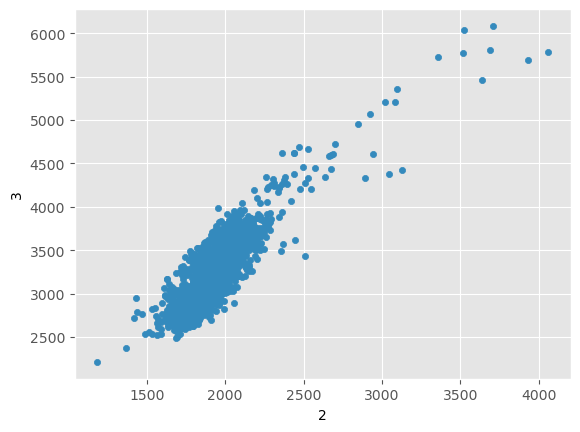

In [88]:
store_1234.plot.scatter(x=2,y=3)

<Axes: xlabel='2', ylabel='3'>

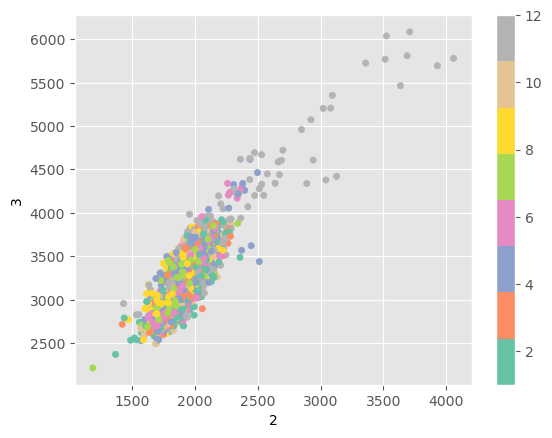

In [91]:
store_1234.plot.scatter(x=2,y=3, c=store_1234.index.month,colormap='Set2')

# Assignment 6: Histograms

Hi there,

Can you plot the distributions of sales for stores 2 and 3?

I want to see how often store 2 has sales similar to store 3, as well as if there are any outlier type days.

Thanks!


In [93]:
store_1234.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


<Axes: ylabel='Frequency'>

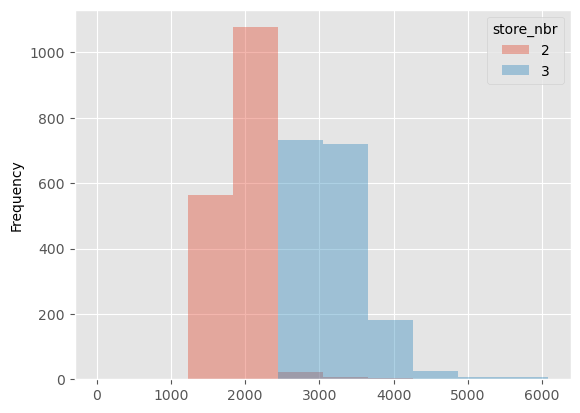

In [102]:
store_1234.loc[:,[2,3]].plot.hist(alpha=0.4)